In [2]:
import pandas as pd
import numpy as np

**Q1**

In [3]:
#Dataset read
users=pd.read_csv(r"C:\\Manmeet Kaur\\Occupations.csv", low_memory=False,encoding='latin1')

In [8]:
#mean age per occupation
users_mean=users.groupby('occupation').mean()
users_mean['age']

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [18]:
#gender  per occupation
key=['occupation','gender']
users_ratio=users.groupby(key).count().reset_index()
users_ratio

,occupation,gender,user_id,age,zip_code
0,administrator,F,36,36,36
1,administrator,M,43,43,43
2,artist,F,13,13,13
3,artist,M,15,15,15
4,doctor,M,7,7,7
5,educator,F,26,26,26
6,educator,M,69,69,69
7,engineer,F,2,2,2
8,engineer,M,65,65,65
9,entertainment,F,2,2,2


In [32]:
#Male ratio per occupation in descending order
result = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
s = result[['F', 'M']].sum(axis=1)
result['FemaleRatio'] = result['F'] / s
result['MaleRatio'] = result['M'] / s
sorted_users = result.sort_values(by='MaleRatio', ascending=False)
print(sorted_users)

gender          F    M  FemaleRatio  MaleRatio
occupation                                    
doctor          0    7     0.000000   1.000000
engineer        2   65     0.029851   0.970149
technician      1   26     0.037037   0.962963
retired         1   13     0.071429   0.928571
programmer      6   60     0.090909   0.909091
executive       3   29     0.093750   0.906250
scientist       3   28     0.096774   0.903226
entertainment   2   16     0.111111   0.888889
lawyer          2   10     0.166667   0.833333
salesman        3    9     0.250000   0.750000
educator       26   69     0.273684   0.726316
student        60  136     0.306122   0.693878
other          36   69     0.342857   0.657143
marketing      10   16     0.384615   0.615385
writer         19   26     0.422222   0.577778
none            4    5     0.444444   0.555556
administrator  36   43     0.455696   0.544304
artist         13   15     0.464286   0.535714
librarian      29   22     0.568627   0.431373
healthcare   

In [35]:
#Minimum age per occupation
users.groupby('occupation').age.min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [36]:
#Maximum age per occupation
users.groupby('occupation').age.max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [38]:
#For each combination of occupation and sex, calculate the mean age
key=['occupation','gender']
users.groupby(key).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [40]:
#For each occupation present the percentage of women and men
result = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
s = result[['F', 'M']].sum(axis=1)
result['FemaleRatio'] = result['F'] / s
result['MaleRatio'] = result['M'] / s
result

gender,F,M,FemaleRatio,MaleRatio
occupation,,,,
administrator,36,43,0.455696,0.544304
artist,13,15,0.464286,0.535714
doctor,0,7,0.000000,1.000000
educator,26,69,0.273684,0.726316
engineer,2,65,0.029851,0.970149
entertainment,2,16,0.111111,0.888889
executive,3,29,0.093750,0.906250
healthcare,11,5,0.687500,0.312500
homemaker,6,1,0.857143,0.142857


**Q2**

In [41]:
#Dataset read
euro12=pd.read_csv(r"C:\\Manmeet Kaur\\Euro.csv", low_memory=False,encoding='latin1')

In [42]:
#Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [47]:
#team participated in the Euro2012
teams=euro12['Team'].nunique()
print('Number of teams :', teams)

Number of teams : 16


In [46]:
#number of columns in the dataset
shape = euro12.shape
print('Number of columns :', shape[1])

Number of columns : 35


In [52]:
#View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline.head(10)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [56]:
#Sort the teams by Red Cards, 
sort_red=euro12.sort_values(by='Red Cards',ascending=False)
sort_red

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
7,Italy,6,34,45,43.00%,7.50%,110,2,0,0,...,20,74.10%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.30%,9.30%,82,6,0,0,...,10,71.50%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.90%,16.00%,100,0,1,0,...,15,93.80%,102,83,19,11,0,17,17,18
0,Croatia,4,13,12,51.90%,16.00%,32,0,0,0,...,13,81.30%,41,62,2,9,0,9,9,16
6,Greece,5,8,18,30.70%,19.20%,32,1,1,1,...,13,65.10%,67,48,12,9,1,12,12,20
1,Czech Republic,4,13,18,41.90%,12.90%,39,0,0,0,...,9,60.10%,53,73,8,7,0,11,11,19
9,Poland,2,15,23,39.40%,5.20%,48,0,0,0,...,6,66.70%,48,56,3,7,1,7,7,17
14,Sweden,5,17,19,47.20%,13.80%,39,3,0,0,...,8,61.60%,35,51,7,7,0,9,9,18
4,France,3,22,24,37.90%,6.50%,65,1,0,0,...,6,54.60%,36,51,5,6,0,11,11,19
11,Republic of Ireland,1,7,12,36.80%,5.20%,28,0,0,0,...,17,65.40%,43,51,11,6,1,10,10,17


In [ ]:
#Sort teams by Yellow Cards
sort_yellow=euro12.sort_values(by='Yellow Cards',ascending=False)
sort_yellow

In [58]:
#Renaming columns and finding out mean
euro12.rename(columns = {'Yellow Cards':'Yellow_Cards', 'Red Cards':'Red_Cards'}, inplace = True)
euro12.groupby('Team').Yellow_Cards.mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow_Cards, dtype: float64

In [62]:
#Filter teams that scored more than 6 goals
goals_more_than_6=euro12[(euro12['Goals']>6)]
print(goals_more_than_6['Team'])

5     Germany
13      Spain
Name: Team, dtype: object


In [65]:
#Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow_Cards,Red_Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.80%,15.60%,80,2,1,0,...,10,62.60%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.70%,19.20%,32,1,1,1,...,13,65.10%,67,48,12,9,1,12,12,20


In [68]:
#  Select the first 7 columns
print(euro12.iloc[ : , :7])

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [69]:
#Select all columns except the last 3
print(euro12.iloc[ : , :(shape[1]-3)])

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [73]:
#Present only the Shooting Accuracy from England, Italy and Russia
selected=euro12[['Team','Shooting Accuracy']]
shooting_accuracy=selected[(selected['Team']=='England')|(euro12['Team']=='Italy')|(euro12['Team']=='Russia')]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.00%
7,Italy,43.00%
12,Russia,22.50%


**Q3**

In [74]:
import random

In [75]:
#Create 3 differents Series, each of length 100
X = pd.Series(np.random.randint(1,5,100))
Y = pd.Series(np.random.randint(1,4,100))
Z = pd.Series(np.random.randint(10000,30000,100))

In [77]:
#Create a DataFrame by joinning the Series by column
J = pd.concat([X,Y,Z],axis=1)
J.head(10)

,0,1,2
0,1,2,17470
1,4,1,25722
2,2,3,16301
3,3,2,13693
4,2,2,13489
5,1,1,16619
6,3,1,14775
7,4,1,24289
8,1,2,27440
9,4,1,24774


In [78]:
#Change the name of the columns to bedrs, bathrs, price_sqr_meter
J.columns = ['bedrs','bathrs','price_sqr_meter']
J.head(10)

,bedrs,bathrs,price_sqr_meter
0,1,2,17470
1,4,1,25722
2,2,3,16301
3,3,2,13693
4,2,2,13489
5,1,1,16619
6,3,1,14775
7,4,1,24289
8,1,2,27440
9,4,1,24774


In [79]:
#Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([X,Y,Z],axis=0)
bigcolumn

0         1
1         4
2         2
3         3
4         2
      ...  
95    28860
96    29668
97    26971
98    18710
99    18691
Length: 300, dtype: int32

In [80]:
#Ops it seems it is going only until index 99. Is it true?
len(bigcolumn)

300

**Yes it is true**

In [81]:
#Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          1
1          4
2          2
3          3
4          2
       ...  
295    28860
296    29668
297    26971
298    18710
299    18691
Length: 300, dtype: int32

Q4

In [35]:
#Dataset read
data=pd.read_csv(r"C:\Manmeet Kaur\\wind.csv", low_memory=False,encoding='latin1')
data1=pd.read_csv(r"C:\Manmeet Kaur\\wind.csv", low_memory=False,encoding='latin1')

In [24]:
data.head(10)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
5,61,1,6,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
6,61,1,7,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
7,61,1,8,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
8,61,1,9,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
9,61,1,10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yr      6574 non-null   int64  
 1   Mo      6574 non-null   int64  
 2   Dy      6574 non-null   int64  
 3   RPT     6568 non-null   float64
 4   VAL     6571 non-null   float64
 5   ROS     6572 non-null   float64
 6   KIL     6569 non-null   float64
 7   SHA     6572 non-null   float64
 8   BIR     6574 non-null   float64
 9   DUB     6571 non-null   float64
 10  CLA     6572 non-null   float64
 11  MUL     6571 non-null   float64
 12  CLO     6573 non-null   float64
 13  BEL     6574 non-null   float64
 14  MAL     6570 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 770.5 KB


In [27]:
#Converting the columns to a string format
data['Yr']=data['Yr'].astype(str)
data['Mo']=data['Mo'].astype(str)
data['Dy']=data['Dy'].astype(str)

In [31]:
#Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
cols=["Yr","Mo","Dy"]
data['date'] = data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
data['date']=pd.to_datetime(data['date'])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Yr      6574 non-null   object        
 1   Mo      6574 non-null   object        
 2   Dy      6574 non-null   object        
 3   RPT     6568 non-null   float64       
 4   VAL     6571 non-null   float64       
 5   ROS     6572 non-null   float64       
 6   KIL     6569 non-null   float64       
 7   SHA     6572 non-null   float64       
 8   BIR     6574 non-null   float64       
 9   DUB     6571 non-null   float64       
 10  CLA     6572 non-null   float64       
 11  MUL     6571 non-null   float64       
 12  CLO     6573 non-null   float64       
 13  BEL     6574 non-null   float64       
 14  MAL     6570 non-null   float64       
 15  date    6574 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12), object(3)
memory usage: 821.9+ KB


In [33]:
data['date']

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: date, Length: 6574, dtype: datetime64[ns]

In [36]:
#Converting the years to 1900's
data1['Yr'] += 1900

In [37]:
#Converting the columns to a string format
data1['Yr']=data1['Yr'].astype(str)
data1['Mo']=data1['Mo'].astype(str)
data1['Dy']=data1['Dy'].astype(str)

In [38]:
#Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
cols=["Yr","Mo","Dy"]
data1['date'] = data1[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
data1['date']=pd.to_datetime(data1['date'])

In [39]:
data1['date']

0      1961-01-01
1      1961-01-02
2      1961-01-03
3      1961-01-04
4      1961-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: date, Length: 6574, dtype: datetime64[ns]

In [40]:
#Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Yr      6574 non-null   object        
 1   Mo      6574 non-null   object        
 2   Dy      6574 non-null   object        
 3   RPT     6568 non-null   float64       
 4   VAL     6571 non-null   float64       
 5   ROS     6572 non-null   float64       
 6   KIL     6569 non-null   float64       
 7   SHA     6572 non-null   float64       
 8   BIR     6574 non-null   float64       
 9   DUB     6571 non-null   float64       
 10  CLA     6572 non-null   float64       
 11  MUL     6571 non-null   float64       
 12  CLO     6573 non-null   float64       
 13  BEL     6574 non-null   float64       
 14  MAL     6570 non-null   float64       
 15  date    6574 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12), object(3)
memory usage: 821.9+ KB


In [49]:
#No of missing values in each column
mv=data1.isnull().sum()
mv

Yr      0
Mo      0
Dy      0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
date    0
dtype: int64

In [107]:
#Dropping null values
data2 = data1.dropna()

In [50]:
#No of missing values in each column
mv1=data2.isnull().sum()
mv1

Yr      0
Mo      0
Dy      0
RPT     0
VAL     0
ROS     0
KIL     0
SHA     0
BIR     0
DUB     0
CLA     0
MUL     0
CLO     0
BEL     0
MAL     0
date    0
dtype: int64

In [54]:
#No of non-missing values in each column
nmv2=data2.notnull().sum()
nmv2

Yr      6546
Mo      6546
Dy      6546
RPT     6546
VAL     6546
ROS     6546
KIL     6546
SHA     6546
BIR     6546
DUB     6546
CLA     6546
MUL     6546
CLO     6546
BEL     6546
MAL     6546
date    6546
dtype: int64

In [57]:
#Average windspeeds for each location
import warnings

with warnings.catch_warnings(record=True):
    data_mean=data2.mean(axis=0)
    print(data_mean)

Yr           inf
Mo           inf
Dy           inf
RPT    12.359979
VAL    10.640267
ROS    11.656396
KIL     6.298587
SHA    10.448923
BIR     7.085066
DUB     9.793006
CLA     8.486601
MUL     8.490257
CLO     8.696705
BEL    13.110668
MAL    15.603129
dtype: float64


In [61]:
#Excluding the date related columns
data3=data2.loc[:, ~data2.columns.isin(['Yr', 'Mo','Dy','date'])]
data3.head(10)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
5,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
6,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
7,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
8,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
9,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83
10,10.58,9.87,8.42,2.79,8.71,7.25,7.54,8.33,5.71,8.67,20.71,16.92
11,19.75,12.08,18.50,10.54,10.29,9.46,15.54,11.50,10.37,14.58,15.59,14.09
12,9.92,3.54,8.46,2.96,2.29,0.96,4.63,0.58,2.33,3.37,5.25,7.04


In [66]:
#Average windspeeds for all locations
data1_mean=data3.mean(axis=0)
print("Avg windspeed for all locations",data1_mean.mean())

Avg windspeed for all locations 10.222465245951712


In [74]:
#calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location
loc_stats=data3.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,7.970000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.670000,10.710000
50%,11.710000,10.130000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.250000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.380000,13.540000,9.670000,12.960000,11.420000,11.170000,11.580000,16.880000,19.860000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [81]:
#Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
import warnings

with warnings.catch_warnings(record=True):
    day_stats = pd.DataFrame()
    day_stats['date']=data2['date']
    day_stats['min'] = data2.min(axis=1)
    day_stats['max'] = data2.max(axis=1)
    day_stats['mean'] = data2.mean(axis=1)
    day_stats['std'] = data2.std(axis=1)
    print(day_stats.head(20))

         date    min    max       mean       std
3  1961-01-04   1.79  11.75   6.619167  3.198126
4  1961-01-05   6.17  13.33  10.630000  2.445356
5  1961-01-06   4.42  13.21   8.240000  2.998063
6  1961-01-07   4.96  14.29  10.385000  3.072114
7  1961-01-08   5.91  16.62  10.487500  3.547237
8  1961-01-09   4.75  15.37   9.897500  2.905954
9  1961-01-10   6.54  19.50  10.477500  3.442610
10 1961-01-11   2.79  20.71   9.625000  4.805082
11 1961-01-12   9.46  19.75  13.524167  3.375046
12 1961-01-13   0.58   9.92   4.277500  2.916349
13 1961-01-14   0.50   9.04   3.975833  2.788833
14 1961-01-15   2.37  12.04   6.695000  3.276740
15 1961-01-16   4.71  16.42  10.164167  3.521277
16 1961-01-17   8.71  17.75  13.621667  2.874739
18 1961-01-19   1.04   7.83   4.111667  2.171325
19 1961-01-20   1.58  11.83   5.980000  3.017220
20 1961-01-21   6.13  14.33   9.302500  2.546210
21 1961-01-22   2.17  10.88   7.582500  2.485328
22 1961-01-23   9.96  20.58  14.034167  3.208592
23 1961-01-24  14.83

In [120]:
#Find the average windspeed in January for each location.
data5=data2[(data2['Mo']=='1')]
data5.head(10)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,,,
1961-01-04,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,1961,1,6,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,1961,1,7,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,1961,1,8,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-09,1961,1,9,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
1961-01-10,1961,1,10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83
1961-01-11,1961,1,11,10.58,9.87,8.42,2.79,8.71,7.25,7.54,8.33,5.71,8.67,20.71,16.92
1961-01-12,1961,1,12,19.75,12.08,18.50,10.54,10.29,9.46,15.54,11.50,10.37,14.58,15.59,14.09


In [88]:
import warnings

with warnings.catch_warnings(record=True):
    data5_mean=data5.mean(axis=0)
    print("Avg windspeed for all locations in January",data5_mean)

Avg windspeed for all locations in January Yr           inf
Mo           inf
Dy           inf
RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64


In [92]:
data6=data2.astype(str)
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6546 entries, 3 to 6573
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Yr      6546 non-null   object
 1   Mo      6546 non-null   object
 2   Dy      6546 non-null   object
 3   RPT     6546 non-null   object
 4   VAL     6546 non-null   object
 5   ROS     6546 non-null   object
 6   KIL     6546 non-null   object
 7   SHA     6546 non-null   object
 8   BIR     6546 non-null   object
 9   DUB     6546 non-null   object
 10  CLA     6546 non-null   object
 11  MUL     6546 non-null   object
 12  CLO     6546 non-null   object
 13  BEL     6546 non-null   object
 14  MAL     6546 non-null   object
 15  date    6546 non-null   object
dtypes: object(16)
memory usage: 869.4+ KB


In [110]:
data2 = data2.set_index('date')
data2.head(10)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,,,
1961-01-04,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,1961,1,6,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,1961,1,7,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,1961,1,8,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-09,1961,1,9,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
1961-01-10,1961,1,10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83
1961-01-11,1961,1,11,10.58,9.87,8.42,2.79,8.71,7.25,7.54,8.33,5.71,8.67,20.71,16.92
1961-01-12,1961,1,12,19.75,12.08,18.50,10.54,10.29,9.46,15.54,11.50,10.37,14.58,15.59,14.09


In [111]:
#Downsample the record to a yearly frequency for each location.
data2.groupby(data2.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [115]:
#Downsample the record to a monthly frequency for each location.
data2.groupby(data2.index.to_period('M')).mean().head(10)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
1961-06,9.818929,8.242143,8.830714,5.898571,10.652500,6.591071,9.272143,8.654286,9.170357,9.818214,13.467857,14.688214
1961-07,10.595667,8.255333,9.167000,6.281667,10.407333,6.080000,8.353333,8.228333,7.911667,8.803333,10.951000,12.143000
1961-08,11.925714,10.278929,10.476071,6.930357,12.896071,8.556429,10.148571,10.586429,9.211429,10.648929,14.684643,14.598929
1961-09,12.248929,9.851429,10.533929,7.012143,10.841429,7.162857,8.251786,8.707857,7.694286,9.795357,13.677500,12.902857


In [116]:
#Downsample the record to a weekly frequency for each location.
data2.groupby(data2.index.to_period('W')).mean().head(10)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-02/1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-23/1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-01-30/1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
1961-02-06/1961-02-12,19.684286,16.417143,17.304286,10.774286,14.718571,12.522857,14.934286,14.850000,14.064286,14.440000,21.832857,19.155714
1961-02-13/1961-02-19,14.956667,15.008333,13.813333,10.083333,13.395000,12.020000,9.530000,12.178333,12.508333,13.521667,19.756667,15.925000
1961-02-20/1961-02-26,15.221429,13.625714,14.334286,8.524286,13.655714,10.114286,11.150000,10.875714,10.392857,12.730000,16.304286,14.322857
1961-02-27/1961-03-05,11.824000,12.956000,10.918000,7.900000,11.758000,8.768000,9.326000,10.032000,9.668000,12.068000,17.174000,14.108000


In [122]:
#Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
w = data2.resample('W').agg(['min', 'max', 'mean', 'std'])  
w.loc[w.index[1:53], "RPT":"MAL"].head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
date                                                                     
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
date                                ...                                      
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  4.070420   7.29  17.33  ...   6.693333  3.203652   6.50  15.92   
1961-01-29  4.242125  12.67  25.84  ...  14.921667  3.494638  14.04  26.08   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.908818   6.13  19.41  ...  13.521667  2.772287  14.09  28.62   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  3.490319   8.17  13.67  ...  12.068000  1.729775  11.58  23.45   
1961-03-12  3.359302   7.54  15.50  ...   9.570000  3.065864  10.21  22.71   
1961-03-19  2.352867   5.25  13.96  ...  11.627143  3.099472  11.29  22.79   

                                   MAL                              
                 mean       std    min    max       mean       std  
date                                                                
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.993333  3.941358   6.79  16.08  10.346667  3.407132  
1961-01-29  19.800000  4.675044  17.50  27.63  22.388333  4.224639  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  19.756667  5.021524  10.96  22.58  15.925000  4.763632  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.174000  5.058249   8.83  17.54  14.108000  3.350772  
1961-03-12  16.068333  4.408144   5.54  18.16  13.066667  4.956336  
1961-03-19  19.350000  3.779727  11.34  22.95  16.227143  4.331958  

[10 rows x 48 columns]

**Q5**

In [150]:
chipo=pd.read_csv(r"C:\\Manmeet Kaur\\items.csv", low_memory=False,encoding='latin1')

In [124]:
#See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,Clementine],3.39
2,1,1,Nantucket Nectar,Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98
5,3,1,Chicken Bowl,"Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"Tomatillo Red Chili Salsa, Fajita Vegetables, ...",11.75
8,4,1,Steak Soft Tacos,"Tomatillo Green Chili Salsa, Pinto Beans, Chee...",9.25
9,5,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Pinto B...",9.25


In [125]:
#Number of observations in the dataset
print(chipo.shape[0])

4622


In [126]:
#Number of columns in the dataset
print(chipo.shape[1])

5


In [138]:
#Print the name of all the columns
a=list(chipo.columns)
print(a)

['order_id', 'quantity', 'item_name', ' choice_description', 'item_price']


In [151]:
#Index of dataframe set to order_id
chipo1 = chipo.set_index('order_id')
chipo1.head(10)

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,Izze,Clementine],3.39
1,1,Nantucket Nectar,Apple],3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98
3,1,Chicken Bowl,"Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...",10.98
3,1,Side of Chips,NaN,1.69
4,1,Steak Burrito,"Tomatillo Red Chili Salsa, Fajita Vegetables, ...",11.75
4,1,Steak Soft Tacos,"Tomatillo Green Chili Salsa, Pinto Beans, Chee...",9.25


In [147]:
#Which was the most-ordered item and For the most-ordered item, how many items were ordered?
df1 = chipo1.groupby('item_name').count()
sort=df1.sort_values(by='quantity', ascending=False)
sort.head(1)

,quantity,choice_description,item_price
item_name,,,
Chicken Bowl,726,726,726


**Most order item was Chicken Bowl and the quantity was 726**

In [152]:
#What was the most ordered item in the choice_description column?
df2 = chipo1.groupby('choice_description').count()
sort1=df2.sort_values(by='quantity', ascending=False)
sort1.head(1)

,quantity,item_name,item_price
choice_description,,,
Diet Coke],134,134,134


In [155]:
#How many items were orderd in total?
print(chipo1['item_name'].nunique())

50


In [157]:
#Turn the item price into a float
chipo['item_price']=chipo['item_price'].astype(float)


In [158]:
#Check the description
chipo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4622 entries, 1 to 1834
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quantity            4622 non-null   int64  
 1   item_name           4622 non-null   object 
 2   choice_description  3376 non-null   object 
 3   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 180.5+ KB


In [159]:
#Using lambda
chipo1['item_price'] = chipo1['item_price'].apply(lambda row: float(row))

In [160]:
#Check the description
chipo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4622 entries, 1 to 1834
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quantity            4622 non-null   int64  
 1   item_name           4622 non-null   object 
 2   choice_description  3376 non-null   object 
 3   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 180.5+ KB


In [161]:
#How much was the revenue for the period in the dataset?
chipo1['revenue']=chipo1['quantity']*chipo1['item_price']
chipo1['revenue'].sum()

39237.02

In [162]:
#How many orders were made in the period?
chipo1['quantity'].sum()

4972

In [163]:
#What is the average revenue amount per order?
print(chipo1['revenue'].sum()/chipo1['quantity'].sum())

7.8915969428801285


In [164]:
#How many different items are sold?
print(chipo1['item_name'].nunique())

50


**Q6**

In [176]:
line=pd.read_csv(r"C:\\Manmeet Kaur\\us-marriages-divorces.csv", low_memory=False,encoding='latin1')

#Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
import matplotlib.pyplot as plt
plt.plot(line['Year'], line['Marriages_per_1000'], color='g', label='Marriages per capita')

plt.plot(line['Year'], line['Divorces_per_1000'], color='r', label='Divorces per capita')

plt.legend()
plt.show()

In [180]:
line1=line[(line['Year']>=1900)&(line['Year']<=2000)]
line1

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
34,1901,742000.0,61000.0,77584000,9.6,0.8
35,1902,776000.0,61000.0,79163000,9.8,0.8
36,1903,818000.0,65000.0,80632000,10.1,0.8
37,1904,815000.0,66000.0,82166000,9.9,0.8
...,...,...,...,...,...,...
129,1996,NaN,NaN,269714000,NaN,NaN
130,1997,2384000.0,1163000.0,272958000,8.7,4.3
131,1998,2244000.0,1135000.0,276154000,8.1,4.1
132,1999,2358000.0,1145245.0,279328000,8.4,4.1


**Q7**

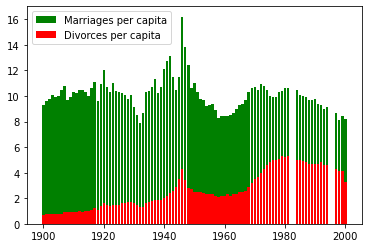

In [181]:
#Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
plt.bar(line1['Year'], line1['Marriages_per_1000'], color='g', label='Marriages per capita')

plt.bar(line1['Year'], line1['Divorces_per_1000'], color='r', label='Divorces per capita')

plt.legend()
plt.show()

**Q8**

In [182]:
kill=pd.read_csv(r"C:\\Manmeet Kaur\\actor_kill_counts.csv", low_memory=False,encoding='latin1')

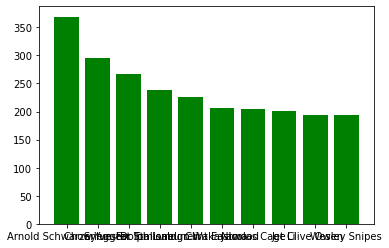

In [187]:
sorted_actors = kill.sort_values(by='Count', ascending=False)
plt.bar(sorted_actors['Actor'], sorted_actors['Count'], color='g', label='Actors with Kills')
plt.show()

**Q9**

In [191]:
#Pie chart showing the fraction of all Roman Emperors that were assassinated vs length of reign
roman=pd.read_csv(r"C:\\Manmeet Kaur\\roman-emperor-reigns.csv", low_memory=False,encoding='latin1')

In [197]:
roman_assassinated=roman[(roman['Cause_of_Death']=='Assassinated')]

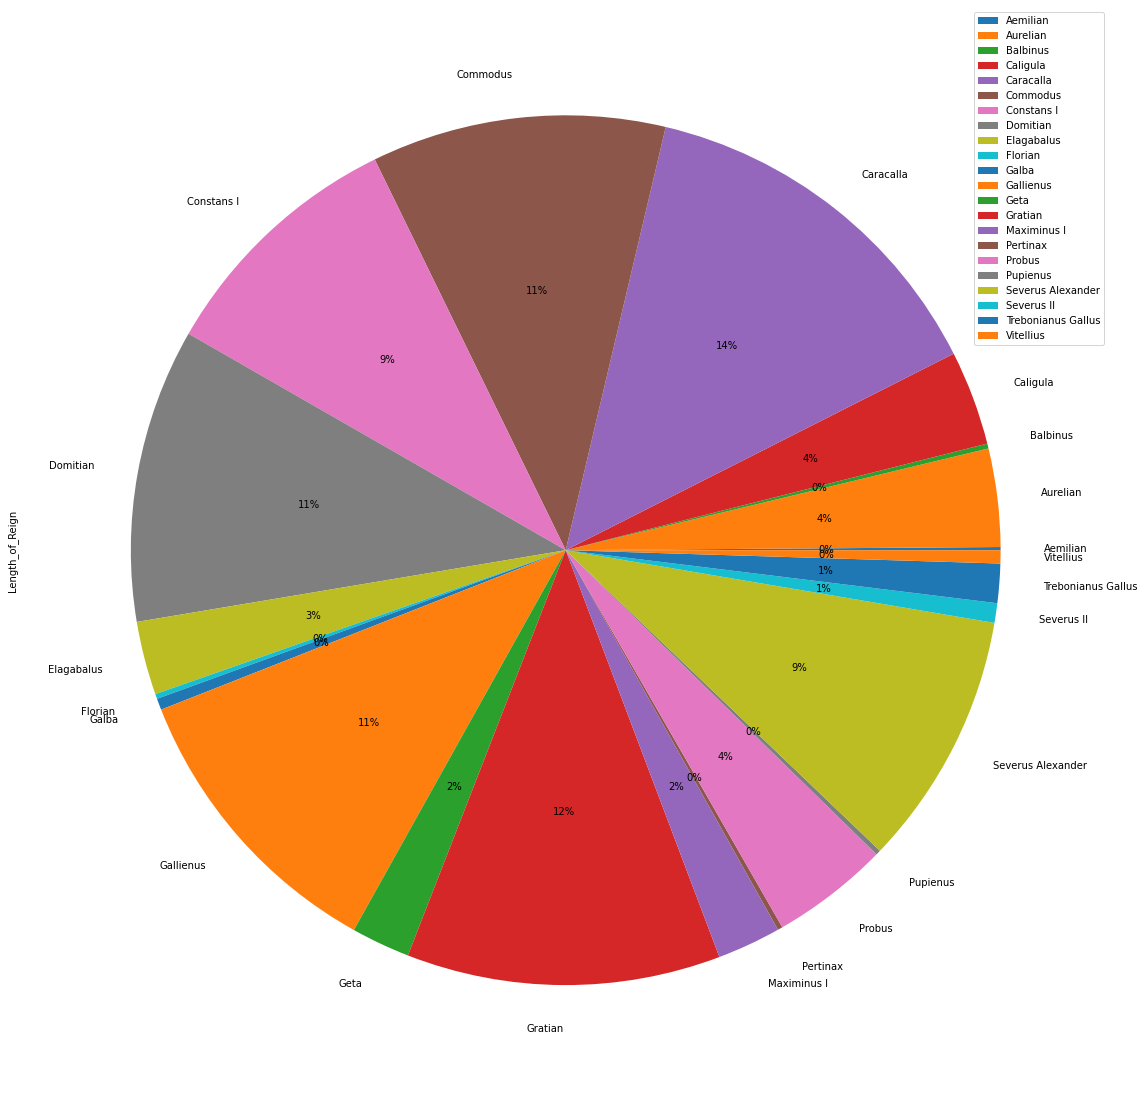

In [223]:
roman_assassinated.groupby(['Emperor']).sum().plot(kind='pie', y='Length_of_Reign',autopct='%1.0f%%')
fig = plt.gcf()
fig.set_size_inches(20,20)

**Q10**

In [224]:
#Scatter plot for showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
arcade=pd.read_csv(r"C:\\Manmeet Kaur\\arcade-revenue-vs-cs-doctorates.csv", low_memory=False,encoding='latin1')

In [226]:
#Renaming columns
arcade.rename(columns = {'Total Arcade Revenue (billions)':'Arcade_Revenue', 'Computer Science Doctorates Awarded (US)':'CS_Doct_Awarded'}, inplace = True)

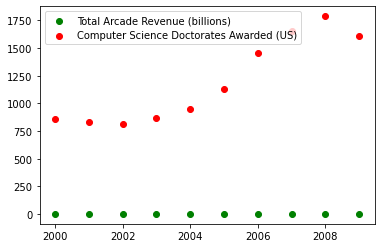

In [230]:
plt.scatter(arcade['Year'], arcade['Arcade_Revenue'], color='g', label='Total Arcade Revenue (billions)')
plt.scatter(arcade['Year'], arcade['CS_Doct_Awarded'], color='r', label='Computer Science Doctorates Awarded (US)')
plt.legend()
plt.show()